In [52]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from ipywidgets import interact

In [7]:
data = pd.read_csv('Crop_recommendation.csv')

In [10]:
data.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [11]:
data.shape

(2200, 8)

In [17]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [18]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [19]:
print('Average Ratio of Nitrogen in the soil : {0:.2f}'.format(data['N'].mean()))

print('Average Ratio of Phosphorous in the soil : {0:.2f}'.format(data['P'].mean()))

print('Average Ratio of Potassium in the soil : {0:.2f}'.format(data['K'].mean()))

print('Average Tempreture in Celsius : {0:.2f}'.format(data['temperature'].mean()))

print('Average relative Humidity in % : {0:.2f}'.format(data['humidity'].mean()))

print('Average PH Value of the soil : {0:.2f}'.format(data['ph'].mean()))

print('Average Rainfall in mm : {0:.2f}'.format(data['rainfall'].mean()))

Average Ratio of Nitrogen in the soil : 50.55
Average Ratio of Phosphorous in the soil : 53.36
Average Ratio of Potassium in the soil : 48.15
Average Tempreture in Celsius : 25.62
Average relative Humidity in % : 71.48
Average PH Value of the soil : 6.47
Average Rainfall in mm : 103.46


In [28]:
@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("---------------------------------------------------")
    print('Statistics for Nitrogen')
    print('Mini N required:', x['N'].min())
    print('Avg N requires:', x['N'].mean())
    print('Max N required:', x['N'].max())
    
    print('---------------------------------------------------')
    print('Statistics for Phosphosrous')
    print('Mini P required:', x['P'].min())
    print('Avg P requires:', x['P'].mean())
    print('Max P required:', x['P'].max())
    
    print('---------------------------------------------------')
    print('Statistics for Potassium')
    print('Mini K required:', x['K'].min())
    print('Avg K requires:', x['K'].mean())
    print('Max K required:', x['K'].max())
    
    print('---------------------------------------------------')
    print('Statistics for Temperature')
    print('Mini Temp required: {0:2f}'.format(x['temperature'].min()))
    print('Avg Temp requires:{0:2f}'.format(x['temperature'].mean()))
    print('Max Temp required:{0:2f}'.format(x['temperature'].max()))
    
   
    
    print('---------------------------------------------------')
    print('Statistics for Humidity')
    print('Mini Humidity required: {0:2f}'.format(x['humidity'].min()))
    print('Avg Humidity requires:{0:2f}'.format(x['humidity'].mean()))
    print('Max Humidity required:{0:2f}'.format(x['humidity'].max()))
    
    print('---------------------------------------------------')
    print('Statistics for PH')
    print('Mini PH required: {0:2f}'.format(x['ph'].min()))
    print('Avg PH requires:{0:2f}'.format(x['ph'].mean()))
    print('Max PH required:{0:2f}'.format(x['ph'].max()))
    
    print('---------------------------------------------------')
    print('Statistics for Rainfall')
    print('Mini Rainfall required: {0:2f}'.format(x['rainfall'].min()))
    print('Avg Rainfall requires:{0:2f}'.format(x['rainfall'].mean()))
    print('Max Rainfall required:{0:2f}'.format(x['rainfall'].max()))
    

    
    
    
    

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [33]:
@interact
def compare(conditions = ['N','P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):

    print('Crops which require greater than average', conditions, '\n')
    print(data[data[conditions]>data[conditions].mean()]['label'].unique())

    print('-------------------------------------------------------------')
    print('Crops which requires less than average', conditions, '\n')
    print(data[data[conditions]<=data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [38]:
print('interesting Patterns')

print('-----------------------------------------------------------------')
print('Crops which requires very high Ratio of Nitrogen content in soil:', data[data['N']>120]['label'].unique())
print('Crops which requires very high Ratio of Phosphosrous content in soil:', data[data['P']>100]['label'].unique())
print('Crops which requires very high Ratio of Potassium content in soil:', data[data['K']>200]['label'].unique())

print('Crops which requires very high Rainfall:', data[data['rainfall']>200]['label'].unique())
print('Crops which requires very low Temperature:', data[data['temperature']<10]['label'].unique())

print('Crops which requires very high Temperature:', data[data['temperature']>40]['label'].unique())

print('Crops which requires very low Humidity:', data[data['humidity']<20]['label'].unique())

print('Crops which requires very low pH:', data[data['ph']<4]['label'].unique())

print('Crops which requires very high pH:', data[data['ph']>9]['label'].unique())

interesting Patterns
-----------------------------------------------------------------
Crops which requires very high Ratio of Nitrogen content in soil: ['cotton']
Crops which requires very high Ratio of Phosphosrous content in soil: ['grapes' 'apple']
Crops which requires very high Ratio of Potassium content in soil: ['grapes' 'apple']
Crops which requires very high Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very low Temperature: ['grapes']
Crops which requires very high Temperature: ['grapes' 'papaya']
Crops which requires very low Humidity: ['chickpea' 'kidneybeans']
Crops which requires very low pH: ['mothbeans']
Crops which requires very high pH: ['mothbeans']


In [40]:
print('Summer Crops')
print(data[(data['temperature']>30) & (data['humidity']>50)]['label'].unique())

print('-------------------------------------------------------------------------')

print('Winter Crops')
print(data[(data['temperature']<20) & (data['humidity']>30)]['label'].unique())

print('-------------------------------------------------------------------------')

print('Rainy Crops')
print(data[(data['rainfall']>200) & (data['humidity']>30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-------------------------------------------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-------------------------------------------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


In [41]:
from sklearn.cluster import KMeans

x=data.drop(['label'],axis=1)

x=x.values

print(x.shape)

(2200, 7)


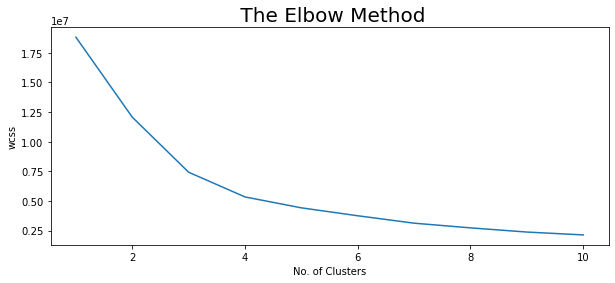

In [44]:
 # detemine the optimum no. of Clusters within the dataset
    
plt.rcParams['figure.figsize'] = (10, 4)

wcss =[]
for i in range(1, 11):
    km = KMeans(n_clusters= i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
#plot result

plt.plot(range(1,11), wcss)
plt.title( ' The Elbow Method', fontsize= 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [45]:
# implemet the KMeans algo to perform Clustering Analysis

km= KMeans(n_clusters= 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

#find out the results
a= data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns= {0: 'cluster'})

# clusters of each crops
print('Check the results after applying the K Means Clustering Analysis \n')

print('Crops in first cluster:', z[z['cluster'] == 0]['label'].unique())
print('------------------------------------------------------------------')

print('Crops in second cluster:', z[z['cluster'] == 1]['label'].unique())
print('------------------------------------------------------------------')

print('Crops in third cluster:', z[z['cluster'] == 2]['label'].unique())
print('------------------------------------------------------------------')

print('Crops in fourth cluster:', z[z['cluster'] == 3]['label'].unique())


Check the results after applying the K Means Clustering Analysis 

Crops in first cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
------------------------------------------------------------------
Crops in second cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
------------------------------------------------------------------
Crops in third cluster: ['grapes' 'apple']
------------------------------------------------------------------
Crops in fourth cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [46]:
y = data['label']
x = data.drop(['label'], axis = 1)

print('shape of x:', x.shape)

print('shape of y:', y.shape)


shape of x: (2200, 7)
shape of y: (2200,)


In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

print(' Shape of x train:', x_train.shape)
print(' Shape of y train:', y_train.shape)

print(' Shape of x test:', x_test.shape)
print(' Shape of y test:', y_test.shape)

 Shape of x train: (1760, 7)
 Shape of y train: (1760,)
 Shape of x test: (440, 7)
 Shape of y test: (440,)


In [50]:
#create predective model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\Users\Daniya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


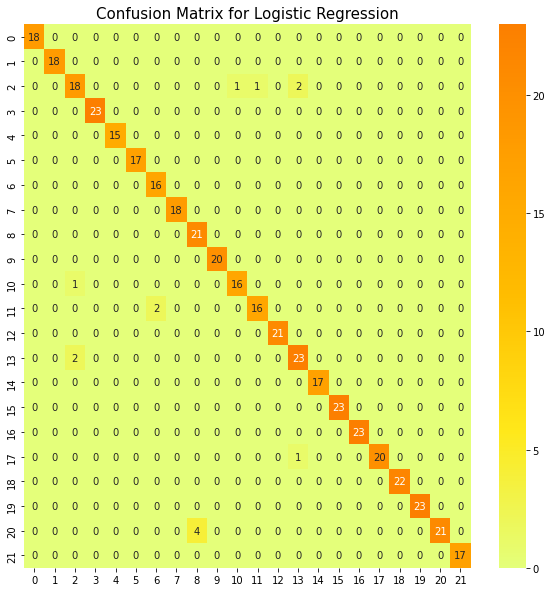

In [53]:
from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix for Logistic Regression', fontsize = 15)

plt.show()

In [55]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [56]:
prediction = model.predict((np.array([[90,
                                      40,
                                      40,
                                      20,
                                      80,
                                      7,
                                      200]])))

print('Suggested Crop for given Climate Condition is :', prediction)

Suggested Crop for given Climate Condition is : ['rice']


C:\Users\Daniya\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
